In [28]:
import pandas as pd
import matplotlib.pyplot as plt
show_info = pd.read_csv("../data/raw/kaggle/show info.csv")
demographics = pd.read_csv("../data/raw/kaggle/demographics.csv")

# Show Information

In [29]:
show_info.shape

(118, 12)

In [30]:
show_info.head()

,ID,show_title,TV_rating,IMDB_total_votes,IMDB_rating,seasons,total_episodes,start_date,end_date,duration,network,genre
0,tt7736544,3Below: Tales of Arcadia,TV-Y7,5776,7.7,2,26,12/21/2018,7/12/2019,203,Netflix,"action, adventure, comedy, family, fantasy, sc..."
1,tt1305826,Adventure Time,TV-PG,86837,8.6,10,282,4/5/2010,7/20/2018,2839,Cartoon Network,"action, adventure, comedy, family, fantasy, sc..."
2,tt11165358,Adventure Time: Distant Lands,TV-PG,3322,8.7,1,4,6/25/2020,9/2/2021,434,HBO Max,"action, adventure, comedy, family, fantasy, sc..."
3,tt1790914,Allen Gregory,TV-14,3442,4.1,1,7,10/30/2011,12/18/2011,49,Fox,comedy
4,tt0397306,American Dad!,TV-14,123144,7.3,19,322,2/6/2005,NaN,6201,Fox,comedy


While the demographic dataset contains 353 entries (that is, 353 characters), the show information contains only 118. This means that there’s 118 unique shows in which the recorded LGBTQIA+ characters appear in.

## General Data Measures

In [31]:
show_info.describe()

,IMDB_total_votes,IMDB_rating,seasons,total_episodes,duration
count,118.000000,118.000000,118.000000,118.000000,118.000000
mean,32712.974576,7.088983,4.347458,68.474576,1586.923729
std,75566.348127,1.495851,5.322709,99.364968,2177.379348
min,47.000000,1.200000,1.000000,1.000000,0.000000
25%,1512.500000,6.500000,1.000000,13.000000,206.250000
50%,5613.000000,7.400000,3.000000,33.500000,897.500000
75%,20561.500000,8.100000,4.750000,77.750000,1810.250000
max,454359.000000,9.200000,33.000000,717.000000,11731.000000


The above data shows the votes, rating, seasons, episodes and airing duration of the shows. 

Once again, taking the median (Q2) as the reference due to the high variations in data, the median show lasted 3 seasons, had 33 episodes, had an airing duration of 897 hours, and a rating of 7.4. 

### Boxplots 

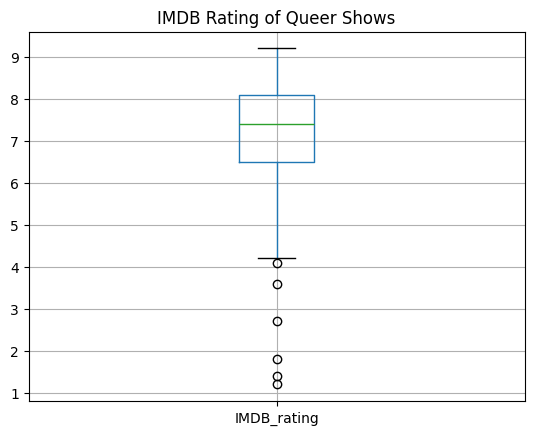

In [32]:
show_info[["IMDB_rating"]].boxplot()
plt.title("IMDB Rating of Queer Shows")
plt.show()

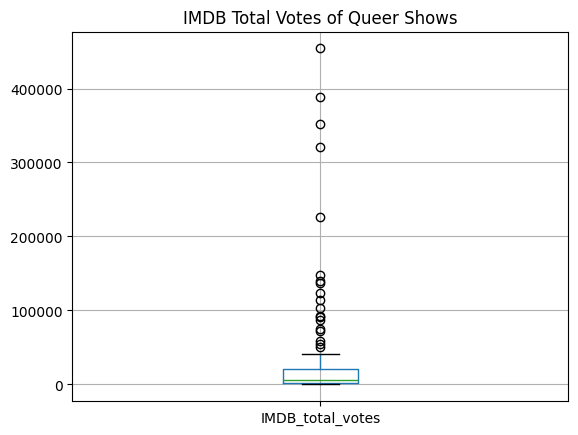

In [33]:
show_info[["IMDB_total_votes"]].boxplot()
plt.title("IMDB Total Votes of Queer Shows")
plt.show()

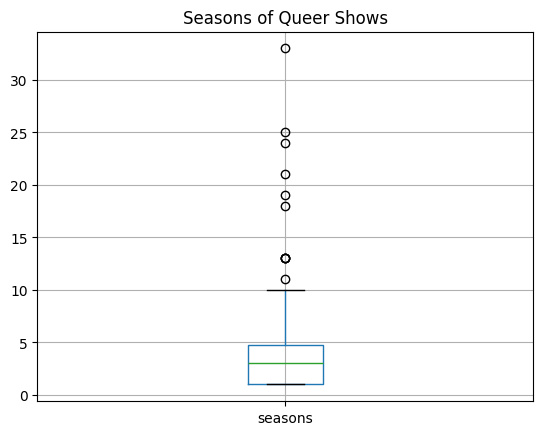

In [34]:
show_info[["seasons"]].boxplot()
plt.title("Seasons of Queer Shows")
plt.show()

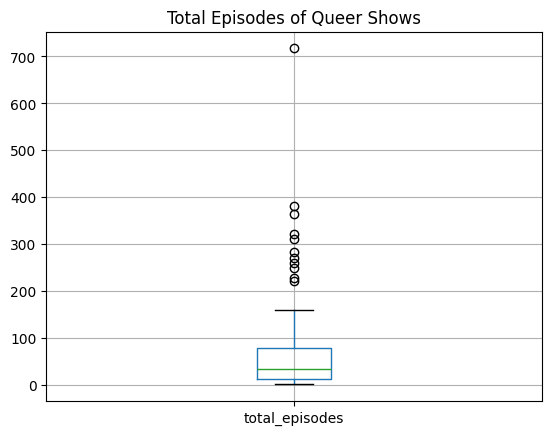

In [35]:
show_info[["total_episodes"]].boxplot()
plt.title("Total Episodes of Queer Shows")
plt.show()

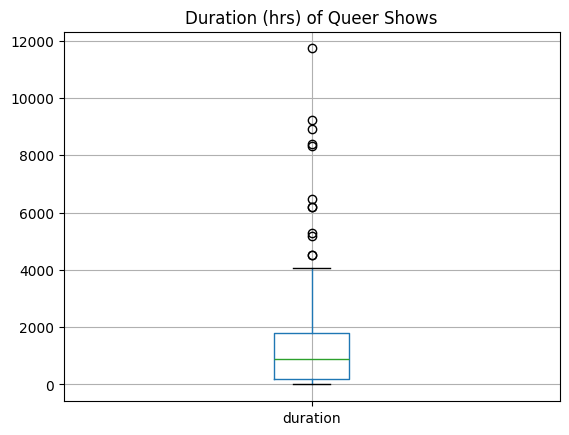

In [36]:
show_info[["duration"]].boxplot()
plt.title("Duration (hrs) of Queer Shows")
plt.show()

As shown by all the boxplots above, all numerical values in the dataset contain outliers. This means that statiscal measures are going to be biased if not treated correctly. This is why the median is the most representative central tendency measure for this data.

## TV Content Rating

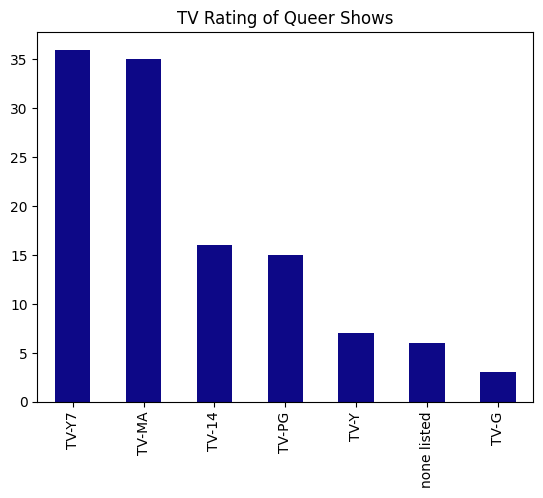

In [37]:
rating = show_info["TV_rating"].value_counts().sort_values(ascending=False).to_frame()
trating = rating.transpose()
rating.plot(kind="bar", title="TV Rating of Queer Shows", xlabel="", colormap="plasma", legend="")
plt.show()

In [38]:
under_18 = trating["TV-Y"] + trating["TV-Y7"] + trating["TV-G"] + trating["TV-PG"] + trating["TV-14"]
over_18 = trating["TV-MA"]
print(f"Rating under 18:      {int(under_18.iloc[0])}")
print(f"Rating over 18:       {int(over_18.iloc[0])}")

Rating under 18:      77
Rating over 18:       35


In [39]:
under_18

count    77
dtype: int64

The majority of recorded TV shows belong to the under 18 years-old TV ratings (77), while only 35 of them are for mature audiences. This is to be expected since the dataset focuses on animated shows, which tend to be produced for younder audiences. 

This is most likely to have an impact in the implicit and explicit LGBTQIA+ representations, since the topic is heavily guarded upon when it comes to children’s media. However, this is also encouraging. Since younger audiences are coming into contact with queer identities, they are more likely to have greater acceptance and hopefully discover their own sexuality and gender identity through the characters represented.

<Axes: ylabel='queer characters'>

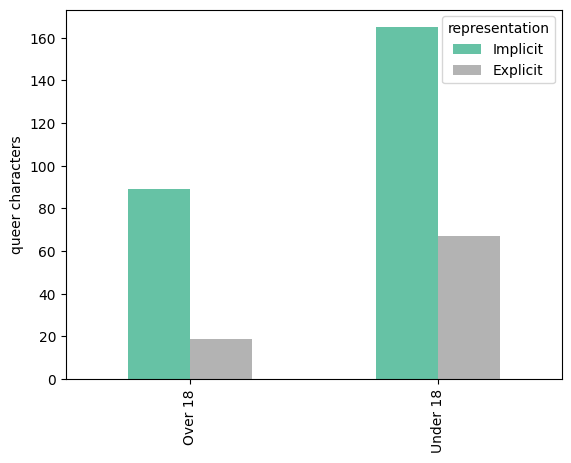

In [48]:
a = pd.merge(demographics, show_info.drop('show_title', axis=1), on='ID').drop('ID', axis=1)

a['confirmation_date'] = pd.to_datetime(a['confirmation_date'])
a["year"] = a["confirmation_date"].dt.year

rating_order = {'TV-Y':'Under 18', 'TV-Y7':'Under 18', 'TV-G':'Under 18', 'TV-PG':'Under 18', 'TV-14':'Under 18', 'TV-MA':'Over 18'}
a['18_rating'] = a['TV_rating']
a["18_rating"] = a['18_rating'].map(rating_order)

a = a.groupby(['18_rating', 'representation']).size().unstack().rename(columns={'Explicit': 'Implicit', 'Implicit': 'Explicit'}) 
a.plot(kind="bar", cmap="Set2", xlabel="", ylabel="queer characters")

Surprisingly, the ratio of implicit-explicit representation is greater in under 18 rated shows (0.40) than in over 18 rated shows (0.21). 

This means that for every 10 implicit representations in children and adolescent shows, there are 4 explicit characters. Meanwhile, in TV shows rated for adults, for every 10 implicit representations, there are 2 explicit LGBTQIA+ characters.

## IMDB Rating

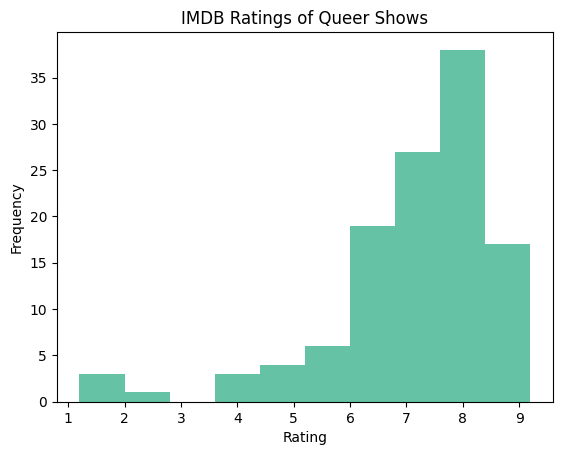

In [ ]:
show_info["IMDB_rating"].plot(kind="hist", title="IMDB Ratings of Queer Shows", xlabel="Rating", colormap="Set2")
plt.show()

The IMDB ratings of queer shows are extremely positive, most of them located above the 6 rating. This indicates a great reception of the media, whcih favours the messages and characters reproduced in the show. 

## Networks

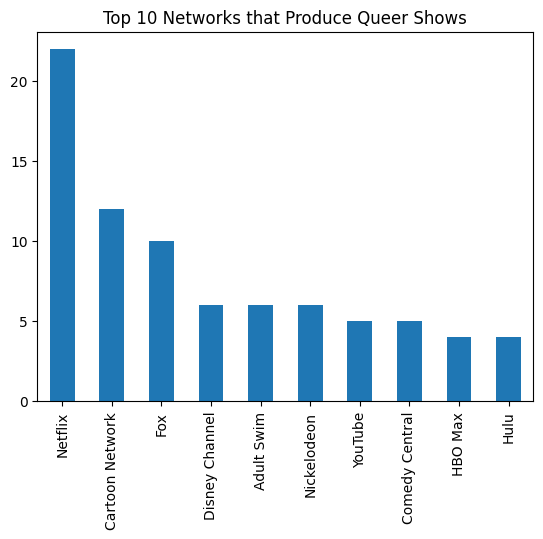

In [ ]:
show_info["network"].value_counts().head(10).plot(kind="bar", title="Top 10 Networks that Produce Queer Shows", xlabel="")
plt.show()

Netflix, Cartoon Network and Fox are the top 3 networks that produce queer shows. These three have produced over 10 different queer shows, in comparison to the rest who have barely made it past 5 shows.